Don't modify, useful stuff

In [33]:
# Generate PCA of edge detection stuff, 85% variance should capture most of the shape
from sklearn.decomposition import PCA

row_col_arr = np.concatenate( ( row_list, col_list ) , axis=1 )

row_col_pca = PCA( n_components=50 )
row_col_pca.fit( row_col_arr )

exp_var_row_col = row_col_pca.explained_variance_ratio_

print np.cumsum( exp_var_row_col )

[0.17420407 0.25562628 0.32039389 0.36657291 0.404183   0.43881671
 0.46981284 0.49670421 0.51882396 0.53870933 0.55590217 0.57235695
 0.58837699 0.60371843 0.61846101 0.63213385 0.64509639 0.65674425
 0.66808784 0.6791482  0.6893035  0.69863251 0.7077116  0.71658876
 0.72533443 0.73348712 0.7414462  0.7490334  0.75625285 0.763363
 0.77024819 0.77693235 0.78310831 0.78914964 0.79477926 0.8001581
 0.80541697 0.81039867 0.81504764 0.81955626 0.82395158 0.82808531
 0.83215091 0.83614096 0.84006131 0.84366072 0.84713066 0.85045847
 0.85364041 0.85673476]


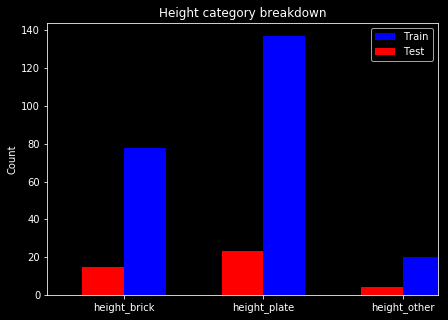

height_brick    15
height_plate    23
height_other     4
dtype: int64


In [104]:
# rs 0
tit  = 'Height category breakdown'
cols = [ col for col in img_df.columns.values if 'height_' in col ]
fig, ax = plt.subplots()
train_df[ cols ].sum().plot.bar( ax=ax, color='b', width=0.3, position=0, label='Train' )
test_df [ cols ].sum().plot.bar( ax=ax, color='r', width=0.3, position=1, label='Test'  )
plt.title( tit )
plt.xticks( rotation=0 )
plt.ylabel( 'Count' )
plt.legend()
plt.show()
print test_df [ cols ].sum()

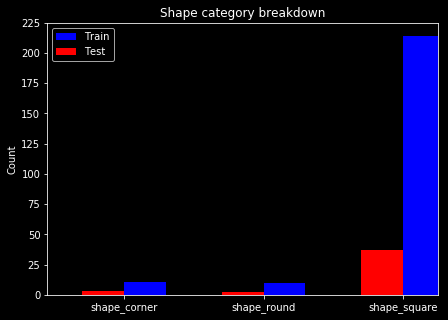

shape_corner     3
shape_round      2
shape_square    37
dtype: int64

In [111]:
tit  = 'Shape category breakdown'
cols = [ col for col in img_df.columns.values if 'shape_' in col ]
fig, ax = plt.subplots()
train_df[ cols ].sum().plot.bar( ax=ax, color='b', width=0.3, position=0, label='Train' )
test_df [ cols ].sum().plot.bar( ax=ax, color='r', width=0.3, position=1, label='Test'  )
plt.title( tit )
plt.xticks( rotation=0 )
plt.ylabel( 'Count' )
plt.legend()
plt.show()
test_df [ cols ].sum()

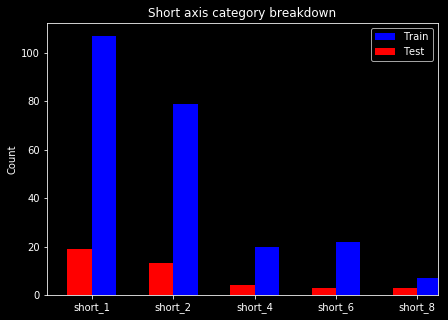

short_1    19
short_2    13
short_4     4
short_6     3
short_8     3
dtype: int64

In [116]:
# rs 57
tit  = 'Short axis category breakdown'
cols = [ col for col in img_df.columns.values if 'short_' in col ]
fig, ax = plt.subplots()
train_df[ cols ].sum().plot.bar( ax=ax, color='b', width=0.3, position=0, label='Train' )
test_df [ cols ].sum().plot.bar( ax=ax, color='r', width=0.3, position=1, label='Test'  )
plt.title( tit )
plt.xticks( rotation=0 )
plt.ylabel( 'Count' )
plt.legend()
plt.show()
test_df [ cols ].sum()

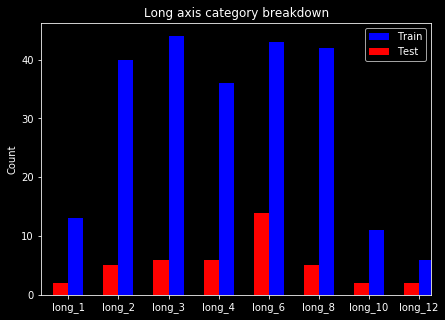

long_1      2
long_2      5
long_3      6
long_4      6
long_6     14
long_8      5
long_10     2
long_12     2
dtype: int64

In [109]:
# rs 0
tit  = 'Long axis category breakdown'
cols = [ col for col in img_df.columns.values if 'long_' in col ]
fig, ax = plt.subplots()
train_df[ cols ].sum().plot.bar( ax=ax, color='b', width=0.3, position=0, label='Train' )
test_df [ cols ].sum().plot.bar( ax=ax, color='r', width=0.3, position=1, label='Test'  )
plt.title( tit )
plt.xticks( rotation=0 )
plt.ylabel( 'Count' )
plt.legend()
plt.show()
test_df [ cols ].sum()

In [1]:
import os, sys

import numpy  as np
import pandas as pd

from scipy import stats
from PIL   import Image, ImageFilter

import matplotlib.pyplot as plt

import generate_image_lists as giList
import generate_image_labels as giLabels
import edge_feature_generation as efg

%matplotlib inline

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14,10)

Below here is used to generate the df containing everything, can skip to below

In [2]:
img_list, label_list = giList.get_white_images_labels()

img_df = giLabels.gen_white_labels()

In [4]:
row_col_ratio_list = []
row_list           = []
col_list           = []


for i in range( 0, img_df.shape[0] ):
    
    if ( i % 20 == 0 ):
        print 'Generated %3i data sets' % i
    
    img = img_df['img_path'].values[i]
    rc, r, c = efg.get_img_edge_data( img, blur=3 )
    row_col_ratio_list.append( rc )
    row_list          .append( r  )
    col_list          .append( c  )
    
# Generate the ratio feature for all rows
# Requires no further processing
img_df['row_col_ratio'] = row_col_ratio_list

Generated   0 data sets
Generated  20 data sets
Generated  40 data sets
Generated  60 data sets
Generated  80 data sets
Generated 100 data sets
Generated 120 data sets
Generated 140 data sets
Generated 160 data sets
Generated 180 data sets
Generated 200 data sets
Generated 220 data sets
Generated 240 data sets
Generated 260 data sets


In [5]:
# Generate PCA of edge detection stuff, 85% variance should capture most of the shape
from sklearn.decomposition import PCA

row_col_arr = np.concatenate( ( row_list, col_list ) , axis=1 )

row_col_pca = PCA( n_components=50 )
row_col_pca.fit( row_col_arr )

exp_var_row_col = row_col_pca.explained_variance_ratio_

print np.cumsum( exp_var_row_col )

[0.17420407 0.25562628 0.32039389 0.36657291 0.404183   0.43881671
 0.46981284 0.49670421 0.51882396 0.53870933 0.55590217 0.57235695
 0.588377   0.60371843 0.61846101 0.63213385 0.64509639 0.65674425
 0.66808784 0.6791482  0.6893035  0.69863251 0.70771161 0.71658877
 0.72533447 0.73348728 0.7414466  0.74903389 0.75625338 0.76336369
 0.77024905 0.77693288 0.78310944 0.78915046 0.79477942 0.80015771
 0.80541762 0.81039939 0.8150474  0.81955366 0.82394988 0.82808464
 0.83214216 0.83613427 0.84005449 0.84359836 0.84709815 0.85041151
 0.85364615 0.85674698]


In [6]:
# Generate df of the pca values
row_col_column_list = [ 'row_col_PCA_'+str(i) for i in range( 0, len(exp_var_row_col) ) ]

rc_pca_vals = row_col_pca.transform( row_col_arr )

rc_pca_df = pd.DataFrame( columns=row_col_column_list, dtype=float )


# Pretty much all normally distributed, so can
#  just do a simple z-scale as going along
for i in range( 0, len(row_col_column_list) ):
    col = row_col_column_list[i]
    rc_pca_df[col] = rc_pca_vals[:,i]
    rc_pca_df[col] = ( rc_pca_df[col] - rc_pca_df[col].mean() ) / rc_pca_df[col].std()

In [7]:
full_df = pd.concat( [img_df, rc_pca_df], axis=1 )

In [8]:
full_df.to_csv('data/white_labels_edge_pca_50.csv')

In [2]:
full_df = pd.read_csv('data/white_labels_edge_pca_50.csv')

Now, focus on model building

In [9]:
train_frac = 0.85

n_train = int( train_frac * full_df.shape[0] )

In [10]:
from scipy.stats import rv_continuous
from scipy.stats import uniform

# Our custom loguniform function,
# which is inexplicitly absent from
# the scipy library
class loguniform_gen(rv_continuous):
    "Loguniform Distribution"
    def _pdf(self, x):
        return 1. / ( x * ( np.log(self.b) - np.log(self.a) ) )
    def _cdf(self, x):
        return ( np.log(x) - np.log(self.a) ) / ( np.log(self.b) - np.log(self.a) )
    
class uniform_gen(rv_continuous):
    "Loguniform Distribution"
    def _pdf(self, x):
        return 1. / ( x * ( (self.b) - (self.a) ) )
    def _cdf(self, x):
        return ( (x) - (self.a) ) / ( (self.b) - (self.a) )

In [11]:
img_df.columns

Index([u'img_path', u'label', u'height_brick', u'height_plate',
       u'height_other', u'shape_corner', u'shape_round', u'shape_square',
       u'short_1', u'short_2', u'short_4', u'short_6', u'short_8', u'long_1',
       u'long_2', u'long_3', u'long_4', u'long_6', u'long_8', u'long_10',
       u'long_12', u'row_col_ratio'],
      dtype='object')

Height first

In [60]:
from sklearn.utils import shuffle

# Use 0 for height
# Use 0 for long
# Use 37 for shape
# 57 for short
shuff_df = shuffle( full_df, random_state=0 )

train_df = shuff_df[:n_train ]
test_df  = shuff_df[ n_train:]

In [61]:
row_col_columns = [ col for col in shuff_df.columns.values if ('row_col_PCA' in col) ]
height_columns  = [ col for col in shuff_df.columns.values if ('height_'     in col) ]

feature_list = ['row_col_ratio'] + row_col_columns

train_height_x = train_df[feature_list].values
test_height_x  =  test_df[feature_list].values

train_height_y = train_df[height_columns].values
test_height_y  =  test_df[height_columns].values

In [62]:
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

param_dict = {
                'C': loguniform_gen( a = 1e-1, b = 1e1 )
             }

height_clf_dict = {}
best_height_clf_dict = {}

for i in range( 0, len(height_columns) ):
    
    log_clf_cv = RandomizedSearchCV(
                                        LogisticRegression(),
                                        cv = 10,
                                        n_iter = 30,
                                        param_distributions=param_dict,
                                   )
    
    log_clf_cv.fit( train_height_x, train_height_y[:,i] )

    print height_columns[i]+': ',
    print log_clf_cv.score( test_height_x, test_height_y[:,i] )
    
    height_clf_dict     [height_columns[i]] = log_clf_cv
    best_height_clf_dict[height_columns[i]] = log_clf_cv.best_estimator_

height_brick:  0.6428571428571429
height_plate:  0.5952380952380952
height_other:  0.9047619047619048


In [25]:
foo = pd.DataFrame( height_clf_dict['height_brick'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
14,0.659574,0.110782
16,0.655319,0.165792
2,0.651064,0.20409
26,0.651064,0.262059
20,0.651064,0.258178


In [26]:
foo = pd.DataFrame( height_clf_dict['height_plate'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
10,0.668085,7.2952
20,0.668085,6.78174
17,0.668085,6.4483
27,0.663830,5.46682
4,0.663830,0.219229


In [27]:
foo = pd.DataFrame( height_clf_dict['height_other'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
9,0.876596,0.162917
0,0.859574,0.480675
8,0.859574,0.316567
22,0.859574,0.296256
11,0.859574,0.433138


In [65]:
from sklearn.utils import shuffle

# Use 0 for height
# Use 0 for long
# Use 37 for shape
# 57 for long
shuff_df = shuffle( full_df, random_state=57 )

train_df = shuff_df[:n_train ]
test_df  = shuff_df[ n_train:]

In [66]:
row_col_columns = [ col for col in shuff_df.columns.values if ('row_col_PCA' in col) ]
short_columns   = [ col for col in shuff_df.columns.values if ('short_'      in col) ]

feature_list = ['row_col_ratio'] + row_col_columns

train_x = train_df[feature_list].values
test_x  =  test_df[feature_list].values

train_y = train_df[short_columns].values
test_y  =  test_df[short_columns].values

In [67]:
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

param_dict = {
                'C': loguniform_gen( a = 1e-1, b = 1e1 )
             }

short_clf_dict = {}
best_short_clf_dict = {}

for i in range( 0, len(short_columns) ):
    
    log_clf_cv = RandomizedSearchCV(
                                        LogisticRegression(),
                                        cv = 10,
                                        n_iter = 30,
                                        param_distributions=param_dict,
                                   )
    
    log_clf_cv.fit( train_x, train_y[:,i] )

    print short_columns[i]+': ',
    print log_clf_cv.score( test_x, test_y[:,i] )
    
    short_clf_dict[short_columns[i]] = log_clf_cv
    best_short_clf_dict[short_columns[i]] = log_clf_cv.best_estimator_

short_1:  0.5952380952380952
short_2:  0.6190476190476191
short_4:  0.8809523809523809
short_6:  0.8333333333333334
short_8:  0.9285714285714286


In [35]:
foo = pd.DataFrame( short_clf_dict['short_1'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
10,0.612766,0.162338
17,0.608511,0.101819
28,0.604255,0.195116
8,0.604255,0.209186
14,0.595745,0.242523


In [36]:
foo = pd.DataFrame( short_clf_dict['short_2'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
9,0.676596,0.240911
28,0.676596,0.275587
18,0.676596,0.230712
24,0.676596,0.274144
11,0.672340,0.492532


In [37]:
foo = pd.DataFrame( short_clf_dict['short_4'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
17,0.897872,0.170065
13,0.893617,0.159165
7,0.893617,0.129615
26,0.885106,0.286834
14,0.885106,0.386427


In [38]:
foo = pd.DataFrame( short_clf_dict['short_6'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
29,0.889362,0.191347
2,0.889362,0.158752
22,0.889362,0.210061
5,0.889362,0.15089
10,0.889362,0.115181


In [39]:
foo = pd.DataFrame( short_clf_dict['short_8'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
16,0.944681,0.25909
26,0.944681,0.211258
12,0.944681,0.242751
22,0.944681,0.209668
7,0.944681,0.204061


Long

In [69]:
from sklearn.utils import shuffle

# Use 0 for height
# Use 0 for long
# Use 37 for shape
# 57 for short
shuff_df = shuffle( full_df, random_state=0 )

train_df = shuff_df[:n_train ]
test_df  = shuff_df[ n_train:]

In [70]:
row_col_columns = [ col for col in shuff_df.columns.values if ('row_col_PCA' in col) ]
long_columns    = [ col for col in shuff_df.columns.values if ('long_'      in col) ]

feature_list = ['row_col_ratio'] + row_col_columns

train_x = train_df[feature_list].values
test_x  =  test_df[feature_list].values

train_y = train_df[long_columns].values
test_y  =  test_df[long_columns].values

In [71]:
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

param_dict = {
                'C': loguniform_gen( a = 1e-1, b = 1e1 )
             }

long_clf_dict = {}
best_long_clf_dict = {}

for i in range( 0, len(long_columns) ):
    
    log_clf_cv = RandomizedSearchCV(
                                        LogisticRegression(),
                                        cv = 10,
                                        n_iter = 30,
                                        param_distributions=param_dict,
                                   )
    
    log_clf_cv.fit( train_x, train_y[:,i] )

    print long_columns[i]+': ',
    print log_clf_cv.score( test_x, test_y[:,i] )
    
    long_clf_dict[long_columns[i]] = log_clf_cv
    best_long_clf_dict[long_columns[i]] = log_clf_cv.best_estimator_

long_1:  0.8809523809523809
long_2:  0.9047619047619048
long_3:  0.8333333333333334
long_4:  0.8095238095238095
long_6:  0.5714285714285714
long_8:  0.7619047619047619
long_10:  0.9523809523809523
long_12:  0.9523809523809523


In [44]:
foo = pd.DataFrame( long_clf_dict['long_1'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
0,0.931915,0.120816
19,0.931915,0.128365
26,0.931915,0.129143
11,0.931915,0.128717
28,0.927660,0.139994


In [45]:
foo = pd.DataFrame( long_clf_dict['long_2'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
27,0.782979,0.119815
18,0.782979,0.145552
16,0.782979,0.132528
24,0.774468,0.16336
1,0.770213,0.285118


In [46]:
foo = pd.DataFrame( long_clf_dict['long_3'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
15,0.740426,0.164192
4,0.740426,0.157767
27,0.740426,0.159517
6,0.740426,0.187423
22,0.740426,0.151233


In [47]:
foo = pd.DataFrame( long_clf_dict['long_4'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
25,0.804255,0.202926
17,0.804255,0.21492
29,0.795745,0.353416
8,0.795745,0.225192
10,0.795745,0.309143


In [48]:
foo = pd.DataFrame( long_clf_dict['long_6'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
0,0.761702,0.132736
22,0.761702,0.105158
25,0.761702,0.115591
7,0.753191,0.209642
8,0.753191,0.187163


In [49]:
foo = pd.DataFrame( long_clf_dict['long_8'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
13,0.782979,0.102934
22,0.782979,0.102467
15,0.778723,0.219917
25,0.778723,0.107613
18,0.778723,0.113301


In [50]:
foo = pd.DataFrame( long_clf_dict['long_10'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
4,0.940426,0.101824
3,0.936170,0.155732
20,0.936170,0.166169
19,0.936170,0.106223
7,0.936170,0.109543


In [51]:
foo = pd.DataFrame( long_clf_dict['long_12'].cv_results_ )
foo.sort_values(['mean_test_score'],ascending=False)[['mean_test_score','param_C']].head()

,mean_test_score,param_C
24,0.970213,0.188493
10,0.970213,0.153098
21,0.970213,0.238501
14,0.965957,0.285113
8,0.965957,0.264823


In [2]:
full_df = pd.read_csv('data/white_labels_edge_pca_50.csv')

In [6]:
import cPickle as pkl
with open('data/short_logistic_clf.pkl','r') as f:
    short_clf_dict = pkl.load(f)
with open('data/long_logistic_clf.pkl','r') as f:
    long_clf_dict = pkl.load(f)

In [7]:
full_df.columns.values

array(['Unnamed: 0', 'img_path', 'label', 'height_brick', 'height_plate',
       'height_other', 'shape_corner', 'shape_round', 'shape_square',
       'short_1', 'short_2', 'short_4', 'short_6', 'short_8', 'long_1',
       'long_2', 'long_3', 'long_4', 'long_6', 'long_8', 'long_10',
       'long_12', 'row_col_ratio', 'row_col_PCA_0', 'row_col_PCA_1',
       'row_col_PCA_2', 'row_col_PCA_3', 'row_col_PCA_4', 'row_col_PCA_5',
       'row_col_PCA_6', 'row_col_PCA_7', 'row_col_PCA_8', 'row_col_PCA_9',
       'row_col_PCA_10', 'row_col_PCA_11', 'row_col_PCA_12',
       'row_col_PCA_13', 'row_col_PCA_14', 'row_col_PCA_15',
       'row_col_PCA_16', 'row_col_PCA_17', 'row_col_PCA_18',
       'row_col_PCA_19', 'row_col_PCA_20', 'row_col_PCA_21',
       'row_col_PCA_22', 'row_col_PCA_23', 'row_col_PCA_24',
       'row_col_PCA_25', 'row_col_PCA_26', 'row_col_PCA_27',
       'row_col_PCA_28', 'row_col_PCA_29', 'row_col_PCA_30',
       'row_col_PCA_31', 'row_col_PCA_32', 'row_col_PCA_33',
       'r

In [10]:
# Do long_10, short_6

features = ['row_col_ratio'] + [ col for col in full_df.columns.values if ('PCA' in col) ]

x_vals = full_df[features]

y_long = full_df['long_10'].values

y_short = full_df['short_6'].values

In [14]:
x_vals.shape

(277, 51)

In [21]:
print foo.shape
print preds.shape

(277,)
(277,)


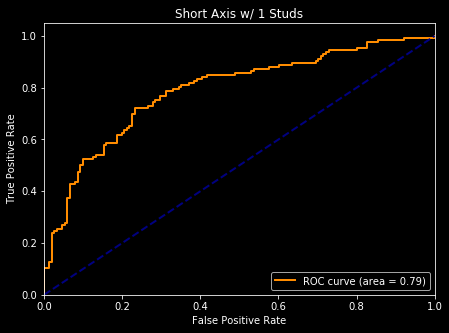

In [52]:
from sklearn.metrics import roc_curve, auc

num_str = str(1)
short_select = 'short_' + num_str
y_short = full_df[short_select].values

preds = short_clf_dict[short_select].predict_proba(x_vals)[:,1]

fpr, tpr, q = roc_curve( y_short, preds )
a_u_c       = auc( fpr, tpr )

lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % a_u_c)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Short Axis w/ '+num_str+' Studs')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = (7,5)
plt.show()
#fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

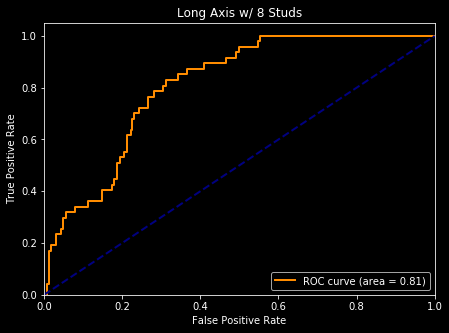

In [49]:
from sklearn.metrics import roc_curve, auc

num_str = str(8)
long_select = 'long_' + num_str
y_long = full_df[long_select].values

preds = long_clf_dict[long_select].predict_proba(x_vals)[:,1]

fpr, tpr, q = roc_curve( y_long, preds )
a_u_c       = auc( fpr, tpr )

lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % a_u_c)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Long Axis w/ '+num_str+' Studs')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = (7,5)
plt.show()
#fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Save all of these

import cPickle as pkl

with open('data/height_logistic_clf.pkl','wb') as f:
    pkl.dump( best_height_clf_dict, f )

with open('data/short_logistic_clf.pkl','wb') as f:
    pkl.dump( best_short_clf_dict, f )

with open('data/long_logistic_clf.pkl','wb') as f:
    pkl.dump( best_long_clf_dict, f )

with open('data/row_col_pca.pkl','wb') as f:
    pkl.dump( row_col_pca, f )